In [1]:
#configuration
import os
import torch # PyTorch is an open source machine learning (ML) framework based on the Python programming language and the Torch library.
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from matplotlib import style 
import seaborn as sns
from textwrap import wrap
import seaborn as sns
import matplotlib.pyplot as plt
import re
import whois
import datetime
import matplotlib.pyplot as plt
from colorama import Fore
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from tld import get_tld, is_tld
import math
from urllib.parse import urlparse
from nltk.tokenize import RegexpTokenizer
import nltk
#nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.model_selection import train_test_split


In [2]:
import pandas as pd
file_path = '/home/roy/Documents/daTa.csv'
df = pd.read_csv(file_path)


In [3]:
#determine whether a CUDA-enabled GPU is available and set the device accordingly.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [4]:
df['label'].value_counts()

label
benign       345738
malicious    104438
Name: count, dtype: int64

In [5]:
df

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0
...,...,...,...,...
450171,450171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1
450172,450172,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1
450173,450173,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1
450174,450174,http://atualizapj.com/,malicious,1


In [6]:

df.drop_duplicates(subset=['url'], keep='first', inplace=True)

In [7]:

df['label'] = df['label'].replace({'good': 1, 'bad': 0}) #for more complex work
'''
df0 = df[df['Label'] == 0].copy()
df1 = df[df['Label'] == 1].copy()
df0= df0[:75000]
df1= df1[:75000]
df = pd.concat([df0,df1], ignore_index=True)
df
'''

"\ndf0 = df[df['Label'] == 0].copy()\ndf1 = df[df['Label'] == 1].copy()\ndf0= df0[:75000]\ndf1= df1[:75000]\ndf = pd.concat([df0,df1], ignore_index=True)\ndf\n"

In [8]:

# Function to check if a URL uses an IP address
def uses_ip_address(url):
    ip_pattern = re.compile(r'\b(?:\d{1,3}\.){3}\d{1,3}\b')
    return bool(ip_pattern.match(url))
    
def lengthurl(url):
    return len(url)

def countletters(url):
    count = 0
    for char in url:
        if char.isalpha():
            count += 1
    return count
    
def count_digits(url):
    count = 0
    for char in url:
        if char.isdigit():
            count += 1
    return count

def numberDots(url):
    count =0
    for char in url:
        if char=='.':
            count+=1

    return count

def numberHyphen(url):
    count =0
    for char in url:
        if char=='-':
            count+=1

    return count

def numberBackSlash(url):
    count =0
    for char in url:
        if char=='/':
            count+=1

    return count

def count_letter_digit_letter(url):
    pattern = re.compile(r'[a-zA-Z]\d+[a-zA-Z]')
    occurrences = len(re.findall(pattern, url))
    return occurrences


def count_digit_letter_digit(url):
    pattern = re.compile(r'\d+[a-zA-Z]\d+')
    occurrences = len(re.findall(pattern, url))
    return occurrences

# Function to count delimiters and find the longest word length
def analyze_delimiters_and_longest_word(url):
    delimiters_count = {}
    longest_word_length = 0
    
    # Define delimiters as any non-alphanumeric characters
    delimiters = re.compile(r'[^a-zA-Z0-9]+')
    components = re.split(delimiters, url)
    
    # Iterate over the components
    for component in components:
        # Count delimiters in each component
        delimiters_count[component] = len(re.findall(delimiters, component))
        
        # Find the longest word length
        if len(component) > longest_word_length:
            longest_word_length = len(component)
    
    return delimiters_count, longest_word_length

def check_domain_reputation(domain):
    known_malicious_domains = ['maliciousdomain1.com', 'maliciousdomain2.net']  # need to add more
    if domain in known_malicious_domains:
        return True
    else:
        return False
        

def has_suspicious_keywords(url):
    suspicious_keywords = ['phishing', 'malware', 'scam']  # Add more 
    for keyword in suspicious_keywords:
        if keyword in url:
            return True
    return False
    
def has_subdomains(url):
    if len(url.split('.')) > 2:
        return 1
    else:
        return 0
    
def analyze_whois(domain):
    try:
        domain_info = whois.whois(domain)
        # You would analyze the WHOIS information here and return True/False based on some criteria
        # For simplicity, let's just return True if we get WHOIS information without errors
        return 1
    except:
        return 0

def httpSecure(url):
    htp = urlparse(url).scheme
    match = str(htp)
    if match=='https':
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0

def number_rate(url):
    # Count occurrences of digits
    digit_count = sum(1 for char in url if char.isdigit())
    
    # Compute number rate
    rate = digit_count / len(url) if len(url) > 0 else 0
    
    return rate

def alphabet_entropy(url):
    # Count occurrences of each letter
    letter_counts = {chr(i): 0 for i in range(ord('a'), ord('z') + 1)}
    total_letters = 0
    
    for char in url.lower():
        if 'a' <= char <= 'z':  # Check if char is a lowercase English letter
            letter_counts[char] += 1
            total_letters += 1
    
    # Compute probabilities and entropy
    entropy = 0
    for count in letter_counts.values():
        if count > 0:
            probability = count / total_letters
            entropy -= probability * math.log2(probability)
    
    return entropy



In [9]:
#df['https'] = df['url'].apply(lambda i: httpSecure(i))
df['uses_ip'] = df['url'].apply(uses_ip_address)

df['count_digits'] = df['url'].apply(count_digits)
df['count_letters'] = df['url'].apply(countletters)
df['length'] = df['url'].apply(lengthurl)
df['letter_digit_letter_count'] = df['url'].apply(count_letter_digit_letter)
df['digit_letter_digit_count'] = df['url'].apply(count_digit_letter_digit)
df['delimiters_count'], df['longest_word_length'] = zip(*df['url'].apply(analyze_delimiters_and_longest_word))
#df['domain_reputation'] = df['url'].apply(check_domain_reputation) #
df['has_suspicious_keywords'] = df['url'].apply(has_suspicious_keywords)
df['has_subdomains'] = df['url'].apply(has_subdomains)
#df['whois_info'] = df['url'].apply(analyze_whois) #
df['numberDots'] = df['url'].apply(numberDots) 
df['numberHyphen'] = df['url'].apply(numberHyphen) 
df['numberBackSlash'] = df['url'].apply(numberBackSlash) 
df['number_rate'] = df['url'].apply(number_rate)
df['alphabet_entropy'] = df['url'].apply(alphabet_entropy)
df

,Unnamed: 0,url,label,result,uses_ip,count_digits,count_letters,length,letter_digit_letter_count,digit_letter_digit_count,delimiters_count,longest_word_length,has_suspicious_keywords,has_subdomains,numberDots,numberHyphen,numberBackSlash,number_rate,alphabet_entropy
0,0,https://www.google.com,benign,0,False,0,17,22,0,0,"{'https': 0, 'www': 0, 'google': 0, 'com': 0}",6,False,1,2,0,2,0.000000,3.292770
1,1,https://www.youtube.com,benign,0,False,0,18,23,0,0,"{'https': 0, 'www': 0, 'youtube': 0, 'com': 0}",7,False,1,2,0,2,0.000000,3.419382
2,2,https://www.facebook.com,benign,0,False,0,19,24,0,0,"{'https': 0, 'www': 0, 'facebook': 0, 'com': 0}",8,False,1,2,0,2,0.000000,3.536887
3,3,https://www.baidu.com,benign,0,False,0,16,21,0,0,"{'https': 0, 'www': 0, 'baidu': 0, 'com': 0}",5,False,1,2,0,2,0.000000,3.577820
4,4,https://www.wikipedia.org,benign,0,False,0,20,25,0,0,"{'https': 0, 'www': 0, 'wikipedia': 0, 'org': 0}",9,False,1,2,0,2,0.000000,3.484184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450171,450171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1,False,0,34,43,0,0,"{'http': 0, 'ecct': 0, 'it': 0, 'com': 0, 'doc...",8,False,1,2,1,5,0.000000,3.525127
450172,450172,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,False,21,118,159,5,3,"{'http': 0, 'faboleena': 0, 'com': 0, 'js': 0,...",32,False,1,2,0,14,0.132075,4.176265
450173,450173,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,False,20,109,147,5,3,"{'http': 0, 'faboleena': 0, 'com': 0, 'js': 0,...",32,False,0,1,0,14,0.136054,4.109076
450174,450174,http://atualizapj.com/,malicious,1,False,0,17,22,0,0,"{'http': 0, 'atualizapj': 0, 'com': 0, '': 0}",10,False,0,1,0,3,0.000000,3.410417


In [10]:
df

,Unnamed: 0,url,label,result,uses_ip,count_digits,count_letters,length,letter_digit_letter_count,digit_letter_digit_count,delimiters_count,longest_word_length,has_suspicious_keywords,has_subdomains,numberDots,numberHyphen,numberBackSlash,number_rate,alphabet_entropy
0,0,https://www.google.com,benign,0,False,0,17,22,0,0,"{'https': 0, 'www': 0, 'google': 0, 'com': 0}",6,False,1,2,0,2,0.000000,3.292770
1,1,https://www.youtube.com,benign,0,False,0,18,23,0,0,"{'https': 0, 'www': 0, 'youtube': 0, 'com': 0}",7,False,1,2,0,2,0.000000,3.419382
2,2,https://www.facebook.com,benign,0,False,0,19,24,0,0,"{'https': 0, 'www': 0, 'facebook': 0, 'com': 0}",8,False,1,2,0,2,0.000000,3.536887
3,3,https://www.baidu.com,benign,0,False,0,16,21,0,0,"{'https': 0, 'www': 0, 'baidu': 0, 'com': 0}",5,False,1,2,0,2,0.000000,3.577820
4,4,https://www.wikipedia.org,benign,0,False,0,20,25,0,0,"{'https': 0, 'www': 0, 'wikipedia': 0, 'org': 0}",9,False,1,2,0,2,0.000000,3.484184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450171,450171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1,False,0,34,43,0,0,"{'http': 0, 'ecct': 0, 'it': 0, 'com': 0, 'doc...",8,False,1,2,1,5,0.000000,3.525127
450172,450172,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,False,21,118,159,5,3,"{'http': 0, 'faboleena': 0, 'com': 0, 'js': 0,...",32,False,1,2,0,14,0.132075,4.176265
450173,450173,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,False,20,109,147,5,3,"{'http': 0, 'faboleena': 0, 'com': 0, 'js': 0,...",32,False,0,1,0,14,0.136054,4.109076
450174,450174,http://atualizapj.com/,malicious,1,False,0,17,22,0,0,"{'http': 0, 'atualizapj': 0, 'com': 0, '': 0}",10,False,0,1,0,3,0.000000,3.410417


In [11]:
from urllib.parse import urlparse

# Function to check if the domain name is an IP address
def uses_ip_address(url):
    domain = urlparse(url).hostname
    if domain:
        ip_pattern = re.compile(r'\b(?:\d{1,3}\.){3}\d{1,3}\b')
        return bool(ip_pattern.match(domain))
    return False
'''
def uses_default_port(url):
    parsed_url = urlparse(url)
    port = parsed_url.port
    if not port or port == ' ':  # If port is not specified or contains a space
        return True  # Default to port 80
    return False
'''
# Add columns for IP address usage and default port usage
df['uses_ip_address'] = df['url'].apply(uses_ip_address)
#df['uses_default_port'] = df['url'].apply(uses_default_port)


In [12]:
import pandas as pd
from urllib.parse import urlparse

# Define the urlparsee function
def urlparsee(url, delimiters_count):
    # Extract domain components from the keys of the delimiters_count dictionary
    domain_components = list(delimiters_count.keys())
    
    # Encode each component into a one-hot vector
    domain_vector = []
    for component in domain_components:
        if component.isdigit():
            domain_vector.append(int(component))  # If the component is a number, simply append it
        else:
            for char in component:
                domain_vector.append(ord(char))  # Convert characters to ASCII and append
    
    # Find the most common urlparse
    most_common_urlparse = max(set(domain_components), key=domain_components.count)
    
    return domain_vector, most_common_urlparse

# Apply urlparsee function to 'url' column and add the result as new columns 'urlparsee' and 'most_common_urlparse'
df[['urlparsee', 'most_common_urlparse']] = df.apply(lambda row: pd.Series(urlparsee(row['url'], row['delimiters_count'])), axis=1)

# Display DataFrame
print(df)


        Unnamed: 0                                                url  \
0                0                             https://www.google.com   
1                1                            https://www.youtube.com   
2                2                           https://www.facebook.com   
3                3                              https://www.baidu.com   
4                4                          https://www.wikipedia.org   
...            ...                                                ...   
450171      450171        http://ecct-it.com/docmmmnn/aptgd/index.php   
450172      450172  http://faboleena.com/js/infortis/jquery/plugin...   
450173      450173  http://faboleena.com/js/infortis/jquery/plugin...   
450174      450174                             http://atualizapj.com/   
450175      450175  http://writeassociate.com/test/Portal/inicio/I...   

            label  result  uses_ip  count_digits  count_letters  length  \
0          benign       0    False             0

In [13]:
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
import time
from collections import Counter
from textwrap import wrap
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from collections import Counter
import string
import nltk
from nltk.corpus import wordnet

tokenizer = RegexpTokenizer(r'[A-Za-z]+')  # regexp tokenizer to split words from text
df.url[0]
tokenizer.tokenize(df.url[0])  # using first row
print('Getting words tokenized ...')
t0 = time.perf_counter()
df['text_tokenized'] = df.url.map(lambda t: tokenizer.tokenize(t))  # tokenize all rows
t1 = time.perf_counter() - t0
print('Time taken', t1, 'sec')

stemmer = SnowballStemmer("english")
t0 = time.perf_counter()
df['text_stemmed'] = df['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1 = time.perf_counter() - t0

t0 = time.perf_counter()
df['text_sent'] = df['text_stemmed'].map(lambda l: ' '.join(l))
t1 = time.perf_counter() - t0

cv = CountVectorizer()

feature = cv.fit_transform(df.text_sent)  # transform all text which we tokenize and stemmed
feature[:5].toarray()  # convert sparse matrix into array to print transformed features
print('end words tokenized ...')
all_words = [words for words in df['text_sent']]
word_counts = Counter(all_words)
top_words = [word for word, _ in word_counts.most_common(1000)]

def create_word_features(text, top_words):
    tokens = word_tokenize(text.lower()) # Tokenize the text
    stemmer = SnowballStemmer("english") # Initialize stemmer and set of English stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [stemmer.stem(word) for word in tokens if word not in stop_words and word.isalpha()] # Stem and filter stopwords from the tokens
    features = [1 if word in filtered_tokens else 0 for word in top_words] # Create word features
    return features
df['word_features'] = df['url'].apply(lambda x: create_word_features(x, top_words)) # Apply create_word_features to each URL in the DataFrame


Getting words tokenized ...
Time taken 1.247369617998629 sec
end words tokenized ...


In [14]:
df

,Unnamed: 0,url,label,result,uses_ip,count_digits,count_letters,length,letter_digit_letter_count,digit_letter_digit_count,...,numberBackSlash,number_rate,alphabet_entropy,uses_ip_address,urlparsee,most_common_urlparse,text_tokenized,text_stemmed,text_sent,word_features
0,0,https://www.google.com,benign,0,False,0,17,22,0,0,...,2,0.000000,3.292770,False,"[104, 116, 116, 112, 115, 119, 119, 119, 103, ...",https,"[https, www, google, com]","[https, www, googl, com]",https www googl com,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,https://www.youtube.com,benign,0,False,0,18,23,0,0,...,2,0.000000,3.419382,False,"[104, 116, 116, 112, 115, 119, 119, 119, 121, ...",https,"[https, www, youtube, com]","[https, www, youtub, com]",https www youtub com,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,https://www.facebook.com,benign,0,False,0,19,24,0,0,...,2,0.000000,3.536887,False,"[104, 116, 116, 112, 115, 119, 119, 119, 102, ...",https,"[https, www, facebook, com]","[https, www, facebook, com]",https www facebook com,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,3,https://www.baidu.com,benign,0,False,0,16,21,0,0,...,2,0.000000,3.577820,False,"[104, 116, 116, 112, 115, 119, 119, 119, 98, 9...",https,"[https, www, baidu, com]","[https, www, baidu, com]",https www baidu com,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,https://www.wikipedia.org,benign,0,False,0,20,25,0,0,...,2,0.000000,3.484184,False,"[104, 116, 116, 112, 115, 119, 119, 119, 119, ...",https,"[https, www, wikipedia, org]","[https, www, wikipedia, org]",https www wikipedia org,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450171,450171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1,False,0,34,43,0,0,...,5,0.000000,3.525127,False,"[104, 116, 116, 112, 101, 99, 99, 116, 105, 11...",aptgd,"[http, ecct, it, com, docmmmnn, aptgd, index, ...","[http, ecct, it, com, docmmmnn, aptgd, index, ...",http ecct it com docmmmnn aptgd index php,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
450172,450172,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,False,21,118,159,5,3,...,14,0.132075,4.176265,False,"[104, 116, 116, 112, 102, 97, 98, 111, 108, 10...",faboleena,"[http, faboleena, com, js, infortis, jquery, p...","[http, faboleena, com, js, inforti, jqueri, pl...",http faboleena com js inforti jqueri plugin mi...,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
450173,450173,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,False,20,109,147,5,3,...,14,0.136054,4.109076,False,"[104, 116, 116, 112, 102, 97, 98, 111, 108, 10...",faboleena,"[http, faboleena, com, js, infortis, jquery, p...","[http, faboleena, com, js, inforti, jqueri, pl...",http faboleena com js inforti jqueri plugin mi...,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
450174,450174,http://atualizapj.com/,malicious,1,False,0,17,22,0,0,...,3,0.000000,3.410417,False,"[104, 116, 116, 112, 97, 116, 117, 97, 108, 10...",,"[http, atualizapj, com]","[http, atualizapj, com]",http atualizapj com,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [15]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))
sw=list(set(stopwords.words("english")))
df['clean_url']=df.url.astype(str)
#df['clean_url']=df['clean_url'].apply(lambda x:" ".join([word for word in x.split() if word not in sw]))
df.head()

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

,Unnamed: 0,url,label,result,uses_ip,count_digits,count_letters,length,letter_digit_letter_count,digit_letter_digit_count,...,number_rate,alphabet_entropy,uses_ip_address,urlparsee,most_common_urlparse,text_tokenized,text_stemmed,text_sent,word_features,clean_url
0,0,https://www.google.com,benign,0,False,0,17,22,0,0,...,0.0,3.292770,False,"[104, 116, 116, 112, 115, 119, 119, 119, 103, ...",https,"[https, www, google, com]","[https, www, googl, com]",https www googl com,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",https://www.google.com
1,1,https://www.youtube.com,benign,0,False,0,18,23,0,0,...,0.0,3.419382,False,"[104, 116, 116, 112, 115, 119, 119, 119, 121, ...",https,"[https, www, youtube, com]","[https, www, youtub, com]",https www youtub com,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",https://www.youtube.com
2,2,https://www.facebook.com,benign,0,False,0,19,24,0,0,...,0.0,3.536887,False,"[104, 116, 116, 112, 115, 119, 119, 119, 102, ...",https,"[https, www, facebook, com]","[https, www, facebook, com]",https www facebook com,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",https://www.facebook.com
3,3,https://www.baidu.com,benign,0,False,0,16,21,0,0,...,0.0,3.577820,False,"[104, 116, 116, 112, 115, 119, 119, 119, 98, 9...",https,"[https, www, baidu, com]","[https, www, baidu, com]",https www baidu com,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",https://www.baidu.com
4,4,https://www.wikipedia.org,benign,0,False,0,20,25,0,0,...,0.0,3.484184,False,"[104, 116, 116, 112, 115, 119, 119, 119, 119, ...",https,"[https, www, wikipedia, org]","[https, www, wikipedia, org]",https www wikipedia org,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",https://www.wikipedia.org


In [17]:
tok= RegexpTokenizer(r'[A-Za-z0-9]+')
tok.tokenize(df.url[1])
df.clean_url=df.clean_url.map(lambda x: tok.tokenize(x))
nltk.download('omw-1.4')
wnl = WordNetLemmatizer()
df['lem_url'] = df['clean_url'].map(lambda x: [wnl.lemmatize(word) for word in x])
df.head()


[nltk_data] Downloading package omw-1.4 to /home/roy/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Unnamed: 0,url,label,result,uses_ip,count_digits,count_letters,length,letter_digit_letter_count,digit_letter_digit_count,...,alphabet_entropy,uses_ip_address,urlparsee,most_common_urlparse,text_tokenized,text_stemmed,text_sent,word_features,clean_url,lem_url
0,0,https://www.google.com,benign,0,False,0,17,22,0,0,...,3.292770,False,"[104, 116, 116, 112, 115, 119, 119, 119, 103, ...",https,"[https, www, google, com]","[https, www, googl, com]",https www googl com,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[https, www, google, com]","[http, www, google, com]"
1,1,https://www.youtube.com,benign,0,False,0,18,23,0,0,...,3.419382,False,"[104, 116, 116, 112, 115, 119, 119, 119, 121, ...",https,"[https, www, youtube, com]","[https, www, youtub, com]",https www youtub com,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[https, www, youtube, com]","[http, www, youtube, com]"
2,2,https://www.facebook.com,benign,0,False,0,19,24,0,0,...,3.536887,False,"[104, 116, 116, 112, 115, 119, 119, 119, 102, ...",https,"[https, www, facebook, com]","[https, www, facebook, com]",https www facebook com,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[https, www, facebook, com]","[http, www, facebook, com]"
3,3,https://www.baidu.com,benign,0,False,0,16,21,0,0,...,3.577820,False,"[104, 116, 116, 112, 115, 119, 119, 119, 98, 9...",https,"[https, www, baidu, com]","[https, www, baidu, com]",https www baidu com,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[https, www, baidu, com]","[http, www, baidu, com]"
4,4,https://www.wikipedia.org,benign,0,False,0,20,25,0,0,...,3.484184,False,"[104, 116, 116, 112, 115, 119, 119, 119, 119, ...",https,"[https, www, wikipedia, org]","[https, www, wikipedia, org]",https www wikipedia org,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[https, www, wikipedia, org]","[http, www, wikipedia, org]"


In [18]:
word_vectorizer = TfidfVectorizer(ngram_range=(1,1), max_features =1500)
unigramdataGet= word_vectorizer.fit_transform(df['lem_url'].astype('str'))
unigramdataGet = unigramdataGet.toarray()
vocab = word_vectorizer.get_feature_names_out ()
x=pd.DataFrame(np.round(unigramdataGet, 1), columns=vocab)
x[x>0] = 1
cv = CountVectorizer()
feature = cv.fit_transform(df.lem_url.astype('str')) 


In [22]:
from scipy.sparse import hstack

'''
X = x:10,df[['uses_ip':1, 'count_letters':1, 'length':1, 'count_digits':1, 'number_rate':1,
        'alphabet_entropy':1, 'uses_ip_address':1, 'uses_default_port':1,
        'longest_word_length':1, 'letter_digit_letter_count':1, 'digit_letter_digit_count':1,
        'has_suspicious_keywords':1, 'has_subdomains':1, 'numberDots':1, 'numberHyphen':1,
        'numberBackSlash':1]]  # Include most_common_urlparse column
'''
x = hstack((feature, df['uses_ip'].values.reshape(-1, 1)))
y=df.result
x_train,x_test,y_train,y_test =  train_test_split(x,y,random_state=42,test_size=0.2,shuffle=True)

In [23]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score,recall_score,f1_score
import seaborn as sb


def get_accuracy(name, trained_model, x_train, y_train, x_test, y_test):
    tree_predict = trained_model.predict(x_test)
    print("Testing accuracy   :", metrics.accuracy_score(y_test, tree_predict) * 100, "%")
    print("MSE [TEST]          :", mean_squared_error(y_test, tree_predict))
    tree_predict1 = trained_model.predict(x_train)
    print("Training accuracy  :", metrics.accuracy_score(y_train, tree_predict1) * 100, "%")
    print("MSE [TRAIN]         :",mean_squared_error(y_train, tree_predict1))

    print("precision : ",precision_score(y_test, tree_predict,average='micro'))
    print("recall    : ",recall_score(y_test, tree_predict,average='micro'))
    print("f1_score  : ",f1_score(y_test, tree_predict,average='micro'))


    cf1 = confusion_matrix(y_test,tree_predict)
    sb.heatmap(cf1,annot=True,fmt = '.0f')
    plt.xlabel('prediction')
    plt.ylabel('Actual')
    plt.title(name+ ' Confusion Matrix')
    plt.show()

    print(classification_report(y_train,  trained_model.predict(x_train)))
    print(classification_report(y_test,  trained_model.predict(x_test)))

Testing accuracy   : 98.77049180327869 %
MSE [TEST]          : 0.012295081967213115
Training accuracy  : 99.24446048758816 %
MSE [TRAIN]         : 0.007555395124118398
precision :  0.9877049180327869
recall    :  0.9877049180327869
f1_score  :  0.9877049180327869


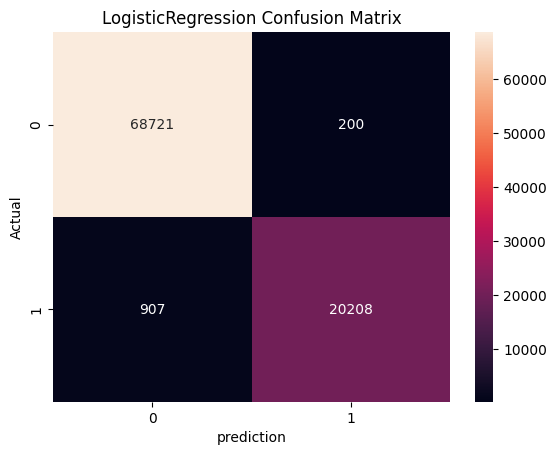

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    276817
           1       0.99      0.97      0.98     83323

    accuracy                           0.99    360140
   macro avg       0.99      0.99      0.99    360140
weighted avg       0.99      0.99      0.99    360140

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     68921
           1       0.99      0.96      0.97     21115

    accuracy                           0.99     90036
   macro avg       0.99      0.98      0.98     90036
weighted avg       0.99      0.99      0.99     90036



In [24]:
from sklearn.linear_model import LogisticRegression

trained_clf_LogisticRegression = LogisticRegression().fit(x_train, y_train)
get_accuracy('LogisticRegression',trained_clf_LogisticRegression,x_train, y_train, x_test, y_test)

In [ ]:
df